In [1]:
from sklearn.datasets import fetch_20newsgroups
categories = [
'alt.atheism',
'talk.religion.misc',
'comp.graphics',
'sci.space',
]
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
# warnings imports
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'Corona_NLP_train.csv'
# Read the CSV file into a pandas DataFrame with a specific encoding
# For example, 'latin1' is a commonly used encoding for CSV files
df_corona = pd.read_csv(file_path, encoding='latin1')
df_russia = pd.read_csv('russia.csv', encoding='latin1')
df_apple = pd.read_csv('apple.csv', encoding='latin1')

# Display the DataFrame
#print(df_corona.columns)
#print("MOTHER RUSSIA", df_russia.columns)
#print("APPLE", df_apple.columns)

# Add a 'label' column to each dataset and limit each dataset to 100 rows
n= 1000
corona = df_corona[['OriginalTweet']].head(n).copy()
russia = df_russia[['content']].head(n).copy()
apple = df_apple[['TweetText']].head(n).copy()

corona['label'] = 0
russia['label'] = 1
apple['label'] = 2

# Display the first few rows of each dataset
print("Corona Dataset:")
print(corona.head())
print("\nRussia Dataset:")
print(russia.head())
print("\nApple Dataset:")
print(apple.head())

# Rename the columns to 'tweets'
corona.rename(columns={'OriginalTweet': 'tweets'}, inplace=True)
russia.rename(columns={'content': 'tweets'}, inplace=True)
apple.rename(columns={'TweetText': 'tweets'}, inplace=True)

# Concatenate the three DataFrames vertically (along rows)
data = pd.concat([corona, apple, russia], ignore_index=True)

# Display the concatenated DataFrame
print(data.head())

Corona Dataset:
                                       OriginalTweet  label
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...      0
1  advice Talk to your neighbours family to excha...      0
2  Coronavirus Australia: Woolworths to give elde...      0
3  My food stock is not the only one which is emp...      0
4  Me, ready to go at supermarket during the #COV...      0

Russia Dataset:
                                             content  label
0  "We have a sitting Democrat US Senator on tria...      1
1  Marshawn Lynch arrives to game in anti-Trump s...      1
2  Daughter of fallen Navy Sailor delivers powerf...      1
3  JUST IN: President Trump dedicates Presidents ...      1
4  19,000 RESPECTING our National Anthem! #StandF...      1

Apple Dataset:
                                           TweetText  label
0  Now all @Apple has to do is get swype on the i...      2
1  @Apple will be adding more carrier support to ...      2
2  Hilarious @youtube video - guy does a duet wit..

In [3]:
# Now, you can use the 'label' column in the 'data' DataFrame
labels = data['label']

# Display the unique labels
true_k =  data['label'].nunique()
print("Unique Labels:", true_k)

Unique Labels: 3


In [4]:
data

,tweets,label
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,advice Talk to your neighbours family to excha...,0
2,Coronavirus Australia: Woolworths to give elde...,0
3,My food stock is not the only one which is emp...,0
4,"Me, ready to go at supermarket during the #COV...",0
...,...,...
2995,"Stragi naziste: Italia condanna, Berlino lasci...",1
2996,"Dal dissesto idrogeologico allo sviluppo, a Ro...",1
2997,#Profumo approda a #Finmeccanica per finire l'...,1
2998,"#MotoGP: Vinales Ã¨ in forma Mondiale, Rossi&a...",1


In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords

def clean_tweet(tweet):
    """
    Clean and preprocess a Twitter tweet.

    Parameters:
    - tweet (str): The raw Twitter tweet.

    Returns:
    - str: The cleaned and preprocessed tweet.
    """
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Remove special characters, numbers, and punctuation
    tweet = re.sub(r'\d+', '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tweet_tokens = nltk.word_tokenize(tweet)
    tweet = ' '.join([word.lower() for word in tweet_tokens if word not in stop_words])
    
    return tweet

# Example usage:
# Apply the clean_tweet function to the 'Tweet' column
data['ctweet'] = data['tweets'].apply(clean_tweet)

# Display the cleaned tweets
print(data[['tweets', 'ctweet']].head())


                                              tweets  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1  advice Talk to your neighbours family to excha...   
2  Coronavirus Australia: Woolworths to give elde...   
3  My food stock is not the only one which is emp...   
4  Me, ready to go at supermarket during the #COV...   

                                              ctweet  
0                        menyrbie philgahan chrisitv  
1  advice talk neighbours family exchange phone n...  
2  coronavirus australia woolworths give elderly ...  
3  food stock one empty please dont panic enough ...  
4  ready go supermarket covid outbreak im paranoi...  


In [6]:
data = data['ctweet'].tolist()
data

['menyrbie philgahan chrisitv',
 'advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order',
 'coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak',
 'food stock one empty please dont panic enough food everyone take need stay calm stay safe covidfrance covid covid coronavirus confinement confinementotal confinementgeneral',
 'ready go supermarket covid outbreak im paranoid food stock litteraly empty coronavirus serious thing please dont panic causes shortage coronavirusfrance restezchezvous stayathome confinement',
 'news regionâ\x92s first confirmed covid case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods timdodson reports',
 'cashier grocery store sharing insights covid prove credibility commented im civics class know im t

In [7]:
#import dataset
# dataset = fetch_20newsgroups(subset='all', categories=categories,
# shuffle=True, random_state=42)
#save labels
# labels = dataset.target
#get the unique labels
# true_k = np.unique(labels).shape[0]

# print("%d documents" % len(dataset.data))
# print("%d categories" % len(dataset.target_names))
# data = dataset.data

vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(data)

print("n_samples: %d, n_features: %d" % X.shape)

#Dimensionality Reduction
# Vectorizer results are normalized, which makes KMeans behave better
    # Since LSA/SVD results are not normalized, we have to redo the normalization.

    #If we do not normalize the data, variables with different scaling 
    # will be weighted differently in the distance formula 
    # that is being optimized during training.
n_components = 5
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
#The final X is the input which we will be using. 
# It has been cleaned, TF-IDF transformed, and its dimensions reduced.
X = lsa.fit_transform(X)
#scikit-learn offers two implementations of kmeans:
# either in mini-batches or without
minibatch = True
if minibatch:
   km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
   init_size=1000, batch_size=1000)
else:
   km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
km.fit(X)
# top words per cluster
print("Clustering sparse data with %s" % km)

original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
   print("Cluster %d:" % i)
   for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind])
print("First method:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f "
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))
#Note: You might see different results, as machine learning 
# algorithms do not produce the exact same results each time.
#km.predict(X_test) to test our model

#imports the KMeans algorithm from the scikit-learn library and 
# creates an instance of it with three clusters, a random state of 0, 
# and automatic initialization
#KMeans algorithm is a clustering algorithm that groups 
# similar data points together based on their distance from each other
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
#The fit method is then called on the normalized training data 
# to train the KMeans model on the data.
kmeans.fit(X)
print("Second method:")
original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
   print("Cluster %d:" % i)
   for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind])
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f "
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))


n_samples: 3000, n_features: 3960
Clustering sparse data with MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=3, n_init=1)
Cluster 0:
 apple
 iphone
 siri
 ios
 new
 store
 iphones
 rt
 thanks
 app
Cluster 1:
 covid
 coronavirus
 store
 food
 grocery
 people
 panic
 shopping
 supermarket
 online
Cluster 2:
 di
 il
 la
 del
 le
 che
 blog
 non
 video
 da
First method:
Homogeneity: 0.691
Completeness: 0.719
V-measure: 0.705
Adjusted Rand-Index: 0.683
Silhouette Coefficient: 0.742 
Second method:
Cluster 0:
 apple
 iphone
 siri
 ios
 new
 store
 iphones
 rt
 thanks
 app
Cluster 1:
 covid
 coronavirus
 store
 food
 grocery
 people
 panic
 shopping
 supermarket
 online
Cluster 2:
 di
 il
 la
 del
 le
 che
 blog
 non
 video
 da
Homogeneity: 0.691
Completeness: 0.719
V-measure: 0.705
Adjusted Rand-Index: 0.683
Silhouette Coefficient: 0.719 


c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python310\lib\site-packages\s

In [8]:
# #import dataset
# dataset = fetch_20newsgroups(subset='all', categories=categories,
# shuffle=True, random_state=42)
# #save labels
# labels = dataset.target
# #get the unique labels
# true_k = np.unique(labels).shape[0]

# print("%d documents" % len(dataset.data))
# print("%d categories" % len(dataset.target_names))
# data = dataset.data
# vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english',
# use_idf=True)
# X = vectorizer.fit_transform(data)

# print("n_samples: %d, n_features: %d" % X.shape)

# #Dimensionality Reduction
# # Vectorizer results are normalized, which makes KMeans behave better
#     # Since LSA/SVD results are not normalized, we have to redo the normalization.

#     #If we do not normalize the data, variables with different scaling 
#     # will be weighted differently in the distance formula 
#     # that is being optimized during training.
# n_components = 5
# svd = TruncatedSVD(n_components)
# normalizer = Normalizer(copy=False)
# lsa = make_pipeline(svd, normalizer)
# #The final X is the input which we will be using. 
# # It has been cleaned, TF-IDF transformed, and its dimensions reduced.
# X = lsa.fit_transform(X)

# #scikit-learn offers two implementations of kmeans:
# # either in mini-batches or without
# minibatch = True
# if minibatch:
#    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
#    init_size=1000, batch_size=1000)
# else:
#    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# km.fit(X)
# # top words per cluster
# print("Clustering sparse data with %s" % km)

# original_space_centroids = svd.inverse_transform(km.cluster_centers_)
# order_centroids = original_space_centroids.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names_out()
# for i in range(true_k):
#    print("Cluster %d:" % i)
#    for ind in order_centroids[i, :10]:
#       print(' %s' % terms[ind])
# print("First method:")
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
# print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
# print("Adjusted Rand-Index: %.3f"
#       % metrics.adjusted_rand_score(labels, km.labels_))
# print("Silhouette Coefficient: %0.3f "
#       % metrics.silhouette_score(X, km.labels_, sample_size=1000))
# #Note: You might see different results, as machine learning 
# # algorithms do not produce the exact same results each time.
# #km.predict(X_test) to test our model

# #imports the KMeans algorithm from the scikit-learn library and 
# # creates an instance of it with three clusters, a random state of 0, 
# # and automatic initialization
# #KMeans algorithm is a clustering algorithm that groups 
# # similar data points together based on their distance from each other
# kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
# #The fit method is then called on the normalized training data 
# # to train the KMeans model on the data.
# kmeans.fit(X)
# print("Second method:")
# original_space_centroids = svd.inverse_transform(km.cluster_centers_)
# order_centroids = original_space_centroids.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names_out()
# for i in range(true_k):
#    print("Cluster %d:" % i)
#    for ind in order_centroids[i, :10]:
#       print(' %s' % terms[ind])
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
# print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
# print("Adjusted Rand-Index: %.3f"
#       % metrics.adjusted_rand_score(labels, km.labels_))
# print("Silhouette Coefficient: %0.3f "
#       % metrics.silhouette_score(X, km.labels_, sample_size=1000))


c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


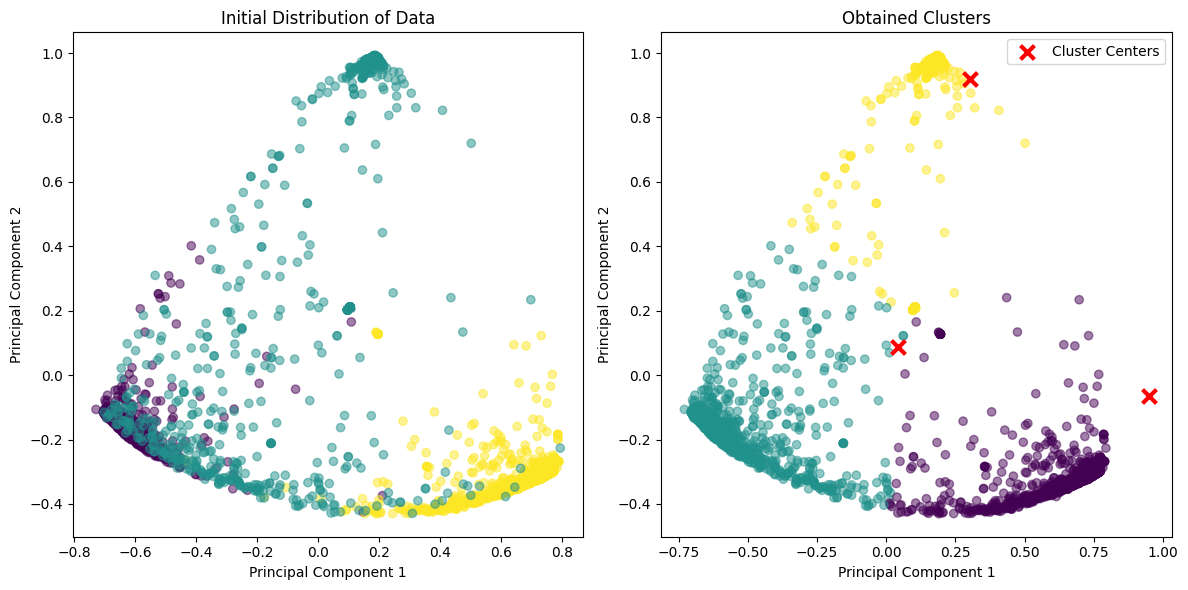

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Assuming `km` is your fitted KMeans model

# Transform the data into 2D space using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Create a label encoder to convert categorical labels to numerical values
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)

# Plot the initial distribution of data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=numerical_labels, cmap='viridis', alpha=0.5)
plt.title("Initial Distribution of Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot the obtained clusters
plt.subplot(1, 2, 2)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=km.labels_, cmap='viridis', alpha=0.5)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    marker='x',
    s=100,
    linewidths=3,
    color='r',
    label='Cluster Centers'
)
plt.title("Obtained Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# Use CLARANS algorithm for clustering
from pyclustering.cluster.clarans import clarans
def clarans_clustering(X, num_clusters, num_neighbors, num_local):
    clarans_instance = clarans(X, num_clusters, num_neighbors, num_local)
    clarans_instance.process()
    clusters = clarans_instance.get_clusters()
    medoids = clarans_instance.get_medoids()
    labels = np.zeros(X.shape[0], dtype=int)
    for i, cluster in enumerate(clusters):
        labels[cluster] = i
    return labels, clusters, medoids

In [11]:
# Set CLARANS parameters
num_neighbors = 3
num_local = 2
# Perform CLARANS clustering
clarans_labels, clarans_clusters, clarans_medoids = clarans_clustering(X, true_k, num_neighbors, num_local)


In [12]:
# Evaluate and print CLARANS clustering results
print("CLARANS:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, clarans_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, clarans_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, clarans_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, clarans_labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, clarans_labels, sample_size=1000))


CLARANS:
Homogeneity: 0.663
Completeness: 0.686
V-measure: 0.674
Adjusted Rand-Index: 0.671
Silhouette Coefficient: 0.721


c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python310\lib\site-packages\s

c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


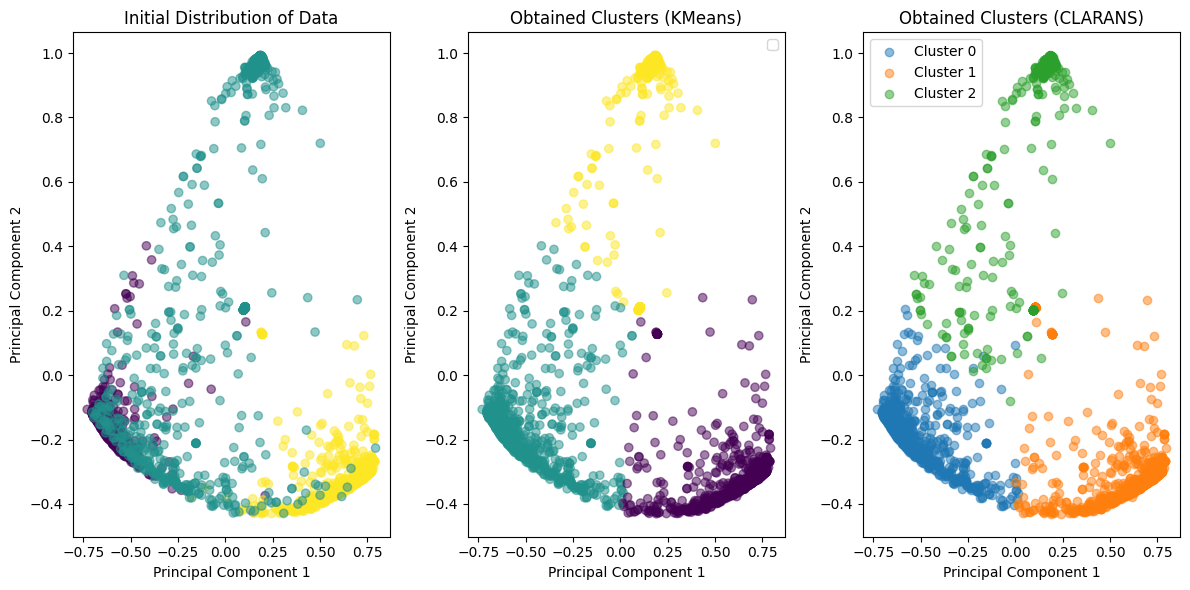

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ... (your existing code)

# Assuming `clarans_clusters` is the clusters obtained from CLARANS
# Assuming `clarans_medoids` are the medoids obtained from CLARANS

# Transform the data into 2D space using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Create a label encoder to convert categorical labels to numerical values
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)

# Plot the initial distribution of data
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=numerical_labels, cmap='viridis', alpha=0.5)
plt.title("Initial Distribution of Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot the obtained clusters for KMeans
plt.subplot(1, 3, 2)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=km.labels_, cmap='viridis', alpha=0.5)
# plt.scatter(
#     km.cluster_centers_[:, 0],
#     km.cluster_centers_[:, 1],
#     marker='x',
#     s=100,
#     linewidths=3,
#     color='r',
#     label='Cluster Centers (KMeans)'
# )
plt.title("Obtained Clusters (KMeans)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

# Plot the obtained clusters for CLARANS

plt.subplot(1, 3, 3)
for i, cluster in enumerate(clarans_clusters):
    plt.scatter(X_2d[cluster, 0], X_2d[cluster, 1], alpha=0.5, label=f'Cluster {i}')
clarans_medoids = clarans_medoids
# plt.scatter(
#     clarans_medoids[:, 0],
#     clarans_medoids[:, 1],
#     marker='x',
#     s=100,
#     linewidths=3,
#     color='r',
#     label='Cluster Centers (CLARANS)'
# )
plt.title("Obtained Clusters (CLARANS)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.tight_layout()
plt.show()


Kmeans:<br>
Homogeneity: 0.691<br>
Completeness: 0.719<br>
V-measure: 0.705<br>
Adjusted Rand-Index: 0.683<br>
Silhouette Coefficient: 0.719 <br>
CLARANS:<br>
Homogeneity: 0.752<br>
Completeness: 0.757<br>
V-measure: 0.754<br>
Adjusted Rand-Index: 0.794<br>
Silhouette Coefficient: 0.495<br>

Homogeneity: Measures how well each cluster contains only members of a single class.<br>
Completeness: Measures how well all members of a given class are assigned to the same cluster.<br>
V-measure: The harmonic mean of homogeneity and completeness. It provides a balance between the two.<br>
Adjusted Rand-Index: Measures the similarity between the true and predicted clusterings, adjusted for chance.<br>
Silhouette Coefficient: Measures how well-defined the clusters are. Ranges from -1 to 1; higher values indicate better-defined clusters.<br>

Higher homogeneity, completeness, and V-measure values indicate better clustering performance.<br>
Higher adjusted Rand-Index values indicate better agreement between the true and predicted clusterings.<br>
Higher Silhouette Coefficient values indicate better-defined clusters.<br>

Homogeneity: CLARANS performs better.<br>
Completeness: CLARANS performs better.<br>
V-measure: CLARANS performs better.<br>
Adjusted Rand-Index: CLARANS performs better.<br>
Silhouette Coefficient: KMeans performs better.<br>